In [1]:
import numpy as np 
import pandas as pd 
import random
import warnings 

random.seed(0)

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../Data/cleaned_metadata.csv')
df.head()

,data_provider,region,lat,lon,severity,year,month,day,season,hour,minute,second,am,bacteria_counts,log_density,log_distance_to_water_m
0,Indiana_State_Department_of_Health,midwest,39.080319,-86.430867,1,2018,5,14,spring,15,0,0,0,<20K,6.371612,0.000000
1,California_Environmental_Data_Exchange_Network,west,36.559700,-121.510000,4,2016,8,31,summer,16,15,0,0,1M - <10M,15.584939,8.163941
2,NC_Division_of_Water_Resources_NC_Department_o...,south,35.875083,-78.878434,1,2020,11,19,fall,0,1,0,1,<20K,5.669881,6.242223
3,NC_Division_of_Water_Resources_NC_Department_o...,south,35.487000,-79.062133,1,2016,8,24,summer,0,1,0,1,<20K,7.386471,4.859812
4,Bureau_of_Water_Kansas_Department_of_Health_an...,midwest,38.049471,-99.827001,3,2019,7,23,summer,0,1,0,1,100K - <1M,11.624690,2.944439


In [3]:
df.drop(['data_provider', 'second', 'am'], axis = 1, inplace = True)

In [4]:
df.head()

,region,lat,lon,severity,year,month,day,season,hour,minute,bacteria_counts,log_density,log_distance_to_water_m
0,midwest,39.080319,-86.430867,1,2018,5,14,spring,15,0,<20K,6.371612,0.000000
1,west,36.559700,-121.510000,4,2016,8,31,summer,16,15,1M - <10M,15.584939,8.163941
2,south,35.875083,-78.878434,1,2020,11,19,fall,0,1,<20K,5.669881,6.242223
3,south,35.487000,-79.062133,1,2016,8,24,summer,0,1,<20K,7.386471,4.859812
4,midwest,38.049471,-99.827001,3,2019,7,23,summer,0,1,100K - <1M,11.624690,2.944439


In [5]:
from sklearn.preprocessing import LabelEncoder

le_region = LabelEncoder()
le_season = LabelEncoder()
df['region'] = le_region.fit_transform(df['region'])
df['season'] = le_season.fit_transform(df['season'])

In [6]:
models = {'Model Name': [],
          'Accuracy' : [],
          'Model' : []}

In [7]:
df['is_toxic'] = df['severity'].apply(lambda x : 1 if x>1 else 0)

In [8]:
from sklearn.model_selection import train_test_split

X = df.drop(['severity', 'bacteria_counts', 'log_density', 'is_toxic'], axis = 1)
y = df['is_toxic']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 101, test_size=0.2)

In [9]:
# from imblearn.over_sampling import SMOTE
# smote = SMOTE(random_state=42)

# X_train, y_train = smote.fit_resample(X_train, y_train)

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier

model_1 = LogisticRegression()
model_2 = RidgeClassifier()

In [12]:
model_1.fit(X_train, y_train)
model_2.fit(X_train, y_train)

RidgeClassifier()

In [13]:
pred_1 = model_1.predict(X_test)
pred_2 = model_2.predict(X_test)

In [14]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(f'Accuracy : {accuracy_score(y_test, pred_1)}')
print(f'Report : {classification_report(y_test, pred_1)}')
print(f'Matrix : {confusion_matrix(y_test, pred_1)}')

Accuracy : 0.7112855324565125
Report :               precision    recall  f1-score   support

           0       0.61      0.81      0.69      1908
           1       0.83      0.64      0.73      2806

    accuracy                           0.71      4714
   macro avg       0.72      0.73      0.71      4714
weighted avg       0.74      0.71      0.71      4714

Matrix : [[1544  364]
 [ 997 1809]]


In [15]:
print(f'Accuracy : {accuracy_score(y_test, pred_2)}')
print(f'Report : {classification_report(y_test, pred_2)}')
print(f'Matrix : {confusion_matrix(y_test, pred_2)}')

Accuracy : 0.7157403478998727
Report :               precision    recall  f1-score   support

           0       0.61      0.86      0.71      1908
           1       0.86      0.62      0.72      2806

    accuracy                           0.72      4714
   macro avg       0.73      0.74      0.72      4714
weighted avg       0.76      0.72      0.72      4714

Matrix : [[1633  275]
 [1065 1741]]


In [16]:
models['Model Name'].append('Logistic Regression')
models['Accuracy'].append(accuracy_score(y_test, pred_1))
models['Model'].append(model_1)

models['Model Name'].append('Ridge Classifier')
models['Accuracy'].append(accuracy_score(y_test, pred_2))
models['Model'].append(model_2)

In [17]:
from sklearn.svm import SVC
model_3 = SVC()
model_3.fit(X_train, y_train)
pred_3 = model_3.predict(X_test)
print(f'Accuracy : {accuracy_score(y_test, pred_3)}')
print(f'Report : {classification_report(y_test, pred_3)}')
print(f'Matrix : {confusion_matrix(y_test, pred_3)}')

Accuracy : 0.7547730165464573
Report :               precision    recall  f1-score   support

           0       0.65      0.86      0.74      1908
           1       0.88      0.68      0.77      2806

    accuracy                           0.75      4714
   macro avg       0.76      0.77      0.75      4714
weighted avg       0.79      0.75      0.76      4714

Matrix : [[1644  264]
 [ 892 1914]]


In [18]:
models['Model Name'].append('SVC')
models['Accuracy'].append(accuracy_score(y_test, pred_3))
models['Model'].append(model_3)

In [19]:
from sklearn.tree import DecisionTreeClassifier
model_4 = DecisionTreeClassifier()
model_4.fit(X_train, y_train)
pred_4 = model_4.predict(X_test)
print(f'Accuracy : {accuracy_score(y_test, pred_4)}')
print(f'Report : {classification_report(y_test, pred_4)}')
print(f'Matrix : {confusion_matrix(y_test, pred_4)}')

Accuracy : 0.7757742893508698
Report :               precision    recall  f1-score   support

           0       0.73      0.71      0.72      1908
           1       0.81      0.82      0.81      2806

    accuracy                           0.78      4714
   macro avg       0.77      0.77      0.77      4714
weighted avg       0.78      0.78      0.78      4714

Matrix : [[1359  549]
 [ 508 2298]]


In [20]:
models['Model Name'].append('Decision Tree')
models['Accuracy'].append(accuracy_score(y_test, pred_4))
models['Model'].append(model_4)

In [21]:
from sklearn.ensemble import RandomForestClassifier
model_5 = RandomForestClassifier()
model_5.fit(X_train, y_train)
pred_5 = model_5.predict(X_test)
print(f'Accuracy : {accuracy_score(y_test, pred_5)}')
print(f'Report : {classification_report(y_test, pred_5)}')
print(f'Matrix : {confusion_matrix(y_test, pred_5)}')

Accuracy : 0.800593975392448
Report :               precision    recall  f1-score   support

           0       0.76      0.74      0.75      1908
           1       0.83      0.84      0.83      2806

    accuracy                           0.80      4714
   macro avg       0.79      0.79      0.79      4714
weighted avg       0.80      0.80      0.80      4714

Matrix : [[1410  498]
 [ 442 2364]]


In [22]:
models['Model Name'].append('RAndom Forest')
models['Accuracy'].append(accuracy_score(y_test, pred_5))
models['Model'].append(model_5)

In [23]:
from xgboost import XGBClassifier

model_6 = XGBClassifier()
model_6.fit(X_train, y_train)
pred_6 = model_6.predict(X_test)
print(f'Accuracy : {accuracy_score(y_test, pred_6)}')
print(f'Report : {classification_report(y_test, pred_6)}')
print(f'Matrix : {confusion_matrix(y_test, pred_6)}')

Accuracy : 0.8039881204921511
Report :               precision    recall  f1-score   support

           0       0.75      0.77      0.76      1908
           1       0.84      0.82      0.83      2806

    accuracy                           0.80      4714
   macro avg       0.80      0.80      0.80      4714
weighted avg       0.81      0.80      0.80      4714

Matrix : [[1477  431]
 [ 493 2313]]


In [24]:
models['Model Name'].append('XGBoost')
models['Accuracy'].append(accuracy_score(y_test, pred_6))
models['Model'].append(model_6)

<Axes: >

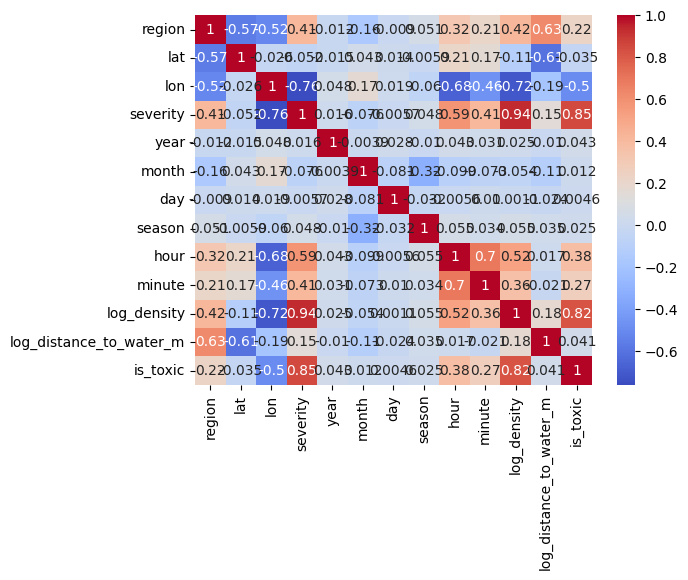

In [25]:
import seaborn as sns

sns.heatmap(df.drop('bacteria_counts', axis = 1).corr(), annot=True, cmap = 'coolwarm')

In [26]:
df.drop('bacteria_counts', axis = 1).corr()

,region,lat,lon,severity,year,month,day,season,hour,minute,log_density,log_distance_to_water_m,is_toxic
region,1.000000,-0.568467,-0.520201,0.412213,-0.012085,-0.157914,-0.009027,0.051156,0.324109,0.212723,0.417986,0.625037,0.222788
lat,-0.568467,1.000000,-0.026415,-0.051733,-0.014600,0.042835,0.014403,-0.005907,0.212110,0.166624,-0.108893,-0.605906,-0.034876
lon,-0.520201,-0.026415,1.000000,-0.761598,0.048019,0.170865,0.018749,-0.059584,-0.677102,-0.460458,-0.715859,-0.191204,-0.497370
severity,0.412213,-0.051733,-0.761598,1.000000,0.016363,-0.076395,-0.005740,0.048441,0.586690,0.410544,0.937246,0.146791,0.850554
year,-0.012085,-0.014600,0.048019,0.016363,1.000000,-0.003862,0.028439,-0.010025,0.042627,0.031158,0.024870,-0.010123,0.043322
month,-0.157914,0.042835,0.170865,-0.076395,-0.003862,1.000000,-0.080762,-0.316035,-0.099100,-0.073381,-0.054318,-0.111459,0.012407
day,-0.009027,0.014403,0.018749,-0.005740,0.028439,-0.080762,1.000000,-0.031711,-0.005575,0.010151,0.001125,-0.024152,0.004559
season,0.051156,-0.005907,-0.059584,0.048441,-0.010025,-0.316035,-0.031711,1.000000,0.055418,0.034472,0.054769,0.034856,0.024547
hour,0.324109,0.212110,-0.677102,0.586690,0.042627,-0.099100,-0.005575,0.055418,1.000000,0.695294,0.521494,0.016890,0.378784
minute,0.212723,0.166624,-0.460458,0.410544,0.031158,-0.073381,0.010151,0.034472,0.695294,1.000000,0.361668,-0.021021,0.270453


In [27]:
models = pd.DataFrame(models)
models

,Model Name,Accuracy,Model
0,Logistic Regression,0.711286,LogisticRegression()
1,Ridge Classifier,0.715740,RidgeClassifier()
2,SVC,0.754773,SVC()
3,Decision Tree,0.775774,DecisionTreeClassifier()
4,RAndom Forest,0.800594,"(DecisionTreeClassifier(max_features='sqrt', r..."
5,XGBoost,0.803988,"XGBClassifier(base_score=None, booster=None, c..."


In [28]:
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline

In [29]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [30]:
# from tensorflow.keras.utils import to_categorical

# Y = to_categorical(y)

# Y[0:5]

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [32]:
# smote = SMOTE(random_state=42)

# X_train, y_train = smote.fit_resample(X_train, y_train)

In [33]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [40]:
model = Sequential([
    Dense(10, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(10, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='relu'),
    # Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', metrics=['accuracy'], loss = 'binary_crossentropy')

In [41]:
history = model.fit(
    X_train, y_train, validation_data = (X_test, y_test), epochs = 100, batch_size = 16
    )

Epoch 1/100


1179/1179 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6257 - loss: 0.5908 - val_accuracy: 0.7039 - val_loss: 0.5052
Epoch 2/100
1179/1179 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7006 - loss: 0.5096 - val_accuracy: 0.7221 - val_loss: 0.4854
Epoch 3/100
1179/1179 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7061 - loss: 0.5055 - val_accuracy: 0.7219 - val_loss: 0.4818
Epoch 4/100
1179/1179 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7180 - loss: 0.4913 - val_accuracy: 0.7234 - val_loss: 0.4812
Epoch 5/100
1179/1179 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7140 - loss: 0.4981 - val_accuracy: 0.7227 - val_loss: 0.4775
Epoch 6/100
1179/1179 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7038 - loss: 0.4937 - val_accuracy: 0.7223 - val_loss: 0.4799
Epoch 7/100
1179/1179 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7189 - loss: 0.4866 - val_accuracy: 0.7230 - val_loss: 0.4780
Epoch 8/100
1179/1179 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7090 - loss: 0.4914 - val_

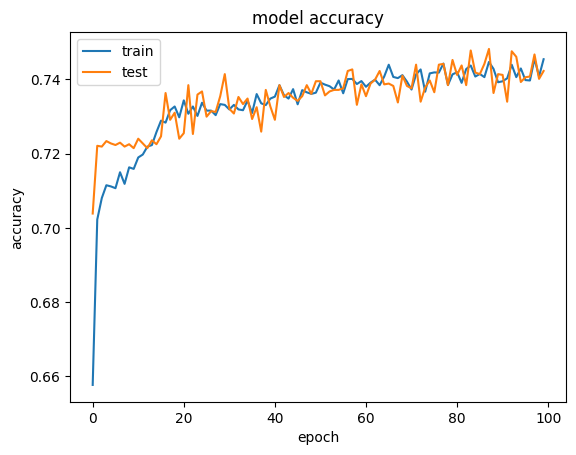

In [42]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [43]:
pred = model.predict(X_test)
# pred_ = np.argmax(to_categorical(pred), axis = 1).flatten()

# true_y = np.argmax(to_categorical(y_test), axis = 1)[:,1]

148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 883us/step


In [44]:
scores = model.evaluate(X_test, y_test)

print(f'Accuracy : {scores[1]}')
print(f'Loss : {scores[0]}')

148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7371 - loss: 0.4663  
Accuracy : 0.7422571182250977
Loss : 0.4627891778945923


In [39]:
import pickle 
with open('../Models/le_region_binary.pkl','wb') as file:
    pickle.dump(le_region, file)
with open('../Models/le_season_binary.pkl','wb') as file:
    pickle.dump(le_season, file)
with open('../Models/scaler_binary.pkl','wb') as file:
    pickle.dump(scaler, file)

model.save('../Models/model_binary.keras')